In [176]:
##import some things
%matplotlib inline
import numpy as np
from quantities import kHz, ms, nA, s, uV
from neo.io import AxonIO
import matplotlib.pyplot as plt

In [177]:
def plotrawsweep(fname, mylabel, sn):
    import numpy as np
    from quantities import kHz, ms, nA, s, uV
    from neo.io import AxonIO
    import matplotlib.pyplot as plt
    
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    
    #grab sweep
    asig = block.segments[sn].analogsignals[0]
    times = asig.times.rescale('s').magnitude
    #set start time to zero
    times = times-times[0]
    #asig = asig.rescale('pA').magnitude
    plt.plot(times, asig, label=mylabel)

In [178]:
def plotsweeps(fname, mylabel, rawbg, submean):
    import numpy as np
    from quantities import kHz, ms, nA, s, uV
    from neo.io import AxonIO
    import matplotlib.pyplot as plt  
    
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    
    if(rawbg):
        #grab sweeps
        #sweep 1
        asig = block.segments[0].analogsignals[0]
        if(submean):
            asig = asig - np.mean(asig)
        times = asig.times.rescale('s').magnitude
        #set start time to zero
        times = times-times[0]
        #asig = asig.rescale('pA').magnitude
        plt.plot(times, asig, alpha=0.3, color='grey')

        #sweep 2
        asig = block.segments[1].analogsignals[0]
        if(submean):
            asig = asig - np.mean(asig)
        times = asig.times.rescale('s').magnitude
        #set start time to zero
        times = times-times[0]
        #asig = asig.rescale('pA').magnitude
        plt.plot(times, asig, alpha=0.3, color='grey')

        #sweep 3
        #grab a sweep
        asig = block.segments[2].analogsignals[0]
        if(submean):
            asig = asig - np.mean(asig)
        times = asig.times.rescale('s').magnitude
        #set start time to zero
        times = times-times[0]
        #asig = asig.rescale('pA').magnitude
        plt.plot(times, asig, alpha=0.3, color='grey')
   
 
    #average 3 sweeps
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    if(submean):
        avg = avg - np.mean(avg)
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]
    #print(avg)
    plt.plot(times, avg, label = mylabel)
        

In [179]:
date = '160120'
datef2 = '1612'

##read in the file so we can see which SAC recording we are looking at
f = open('../data/ChatCreChR2/' + date + '.m')
text = f.read()
print(text)

160120 p57 ChatCre/Chr2 mouse

Light Dissection 
50mL ACSF with: 
   20uL DNQX
   50uL AP5
   100uL LAP4
   12.5uL GABAzine

   
No orientation on the retina

Patch SACs, fill with ALexa 594, and then stim at diff dendritic locations 
455nm LED 


SAC1
7.2mohm pipette
CM = 14
Rm = 550M
Ra 67 M

%centered on soma
%000 shutter was closed
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',333);

%001
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',333);

%002
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%003 centered on soma but focused on dendrites
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%005 centered on the end of the dendrites
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%006 centered on the end of the dendrites hp = +12
%responses are not synched. first one happend

Let's use SAC3 first, since we were able to record at many holding potentials for center at soma focus on dendrites. These are trials 19-25

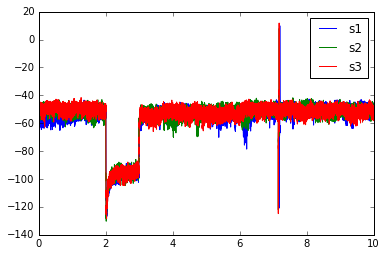

In [180]:
import matplotlib.pyplot as plt   
condition = '0020'
fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'

fig = plt.figure()
plotrawsweep(fname, mylabel = 's1', sn=0)
plotrawsweep(fname, mylabel = 's2', sn=1)
plotrawsweep(fname, mylabel = 's3', sn=2)
plt.legend()

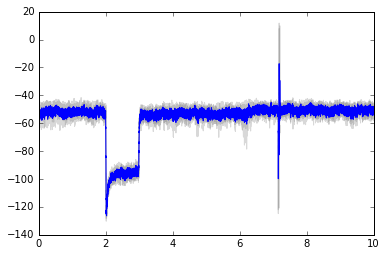

In [181]:
fig, ax = plt.subplots(1, 1)
plotsweeps(fname, mylabel = 's1',rawbg=1, submean=0)

SAC3: Center at soma, focus on dendrite.
Trials:  
21 (-60mV)  
22 (0mV)  
23 (20mV)  
24 (40mV)  
25 (-20mV)  

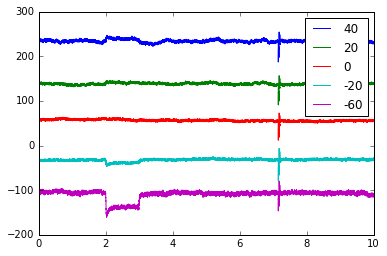

In [213]:
sac3 = np.array([[24, 40],
                [23, 20],
                [22, 0],
                [25, -20],
                [21, -60]])

fig = plt.figure()
for t in range(len(sac3)): #[21,25,22, 23, 24]
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel=str(sac3[t,1]), rawbg=0, submean=0)
#plt.ylim([-300, 300]) 
fig.show()
plt.legend()

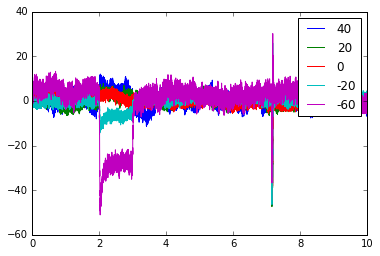

In [215]:
fig = plt.figure()
for t in range(len(sac3)): #[21,25,22, 23, 24]: 
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel=str(sac3[t,1]), rawbg=0, submean=1)
#plt.ylim([0, 2]) 
fig.show()
plt.legend()

SAC5 - 
Trials:
28 CS FS (-60mV)  
29 CD FD (-60mV)  
30 CD FD (0mV)   
32 CD FD (20mV)  
33 CD FD (40mV)
34 CD FD (-20mV)
35 CD FD (-60mV)

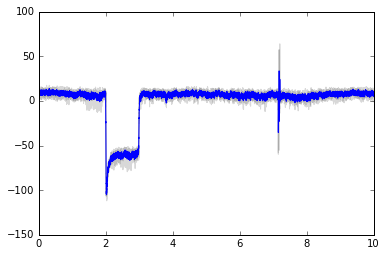

In [220]:
fig = plt.figure()
for t in [28]: 
    condition = '00' + '28'
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel='28', rawbg=1, submean=1)
#plt.ylim([0, 2]) 
fig.show()

Compare same case CDFD at beginning and end of experiment

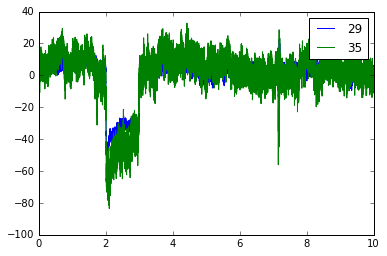

In [222]:
fig = plt.figure()
#plt.ioff()
for t in [29,35]: 
    condition = '00' + str(t)
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(t), rawbg=0, submean=1)
#plt.ion()
#plt.ylim([0, 2]) 

fig.show()
plt.legend()

Compare same case CDFD at beginning and end of experiment

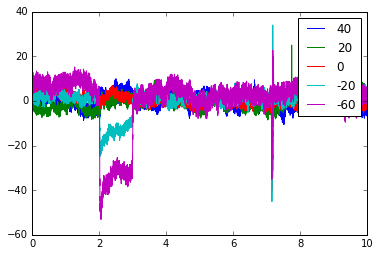

In [225]:
sac5 = np.array([[33, 40],
                [32, 20],
                [30, 0],
                [34, -20],
                [29, -60]])

fig = plt.figure()
for t in range(len(sac5)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)
    plt.label = ('test')
fig.show()
plt.legend()

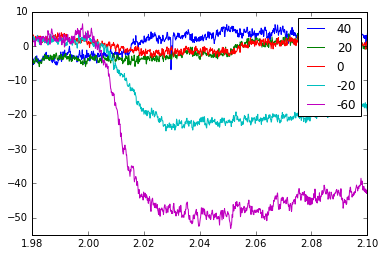

In [227]:
fig = plt.figure()
for t in range(len(sac5)):  #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)
plt.xlim([1.98, 2.1]) 
plt.ylim([-55, 10]) 

fig.show()
plt.legend()